In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import yfinance as yf
import pandas as pd

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY",

        start="2016-01-01", end="2020-02-25",

        auto_adjust = True,

        prepost = False,

        threads = True,
 
    )

print(data.head())


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close     Volume
Date                                                                 
2016-01-04  185.431881  185.931317  183.674575  185.922073  222353500
2016-01-05  186.273516  186.735963  185.024918  186.236526  110845800
2016-01-06  183.443324  185.034142  182.758912  183.887283  152112600
2016-01-07  180.659387  182.610912  179.050068  179.475525  213436100
2016-01-08  180.529929  181.140362  177.191063  177.505524  209817200


In [2]:
import numpy as np #not sure if using log os the way to go...
volume_log = np.log(data['Volume'])
volume_log

Date
2016-01-04    19.219779
2016-01-05    18.523651
2016-01-06    18.840132
2016-01-07    19.178848
2016-01-08    19.161747
                ...    
2020-02-19    17.703542
2020-02-20    18.121781
2020-02-21    18.549849
2020-02-24    18.897464
2020-02-25    19.204186
Name: Volume, Length: 1043, dtype: float64

In [4]:
volume = volume_log # data['Volume'] - Volume is key, what do the market makers use, vwp
Open = data['Open']
Close = data['Close']
low = data['Low']
high = data['High']
drange1 = high - low

data['vopen'] = (volume / .33333) + Open
data['vclose'] = (volume / .33333) + Close
data['vlow'] = (volume / .16665) + low
data['vhigh'] = (volume / .1665) + high

#data['volP'] = (vopen + vclose + vlow + vhigh) / 4

print(data.head())

                  Open        High         Low       Close     Volume  \
Date                                                                    
2016-01-04  185.431881  185.931317  183.674575  185.922073  222353500   
2016-01-05  186.273516  186.735963  185.024918  186.236526  110845800   
2016-01-06  183.443324  185.034142  182.758912  183.887283  152112600   
2016-01-07  180.659387  182.610912  179.050068  179.475525  213436100   
2016-01-08  180.529929  181.140362  177.191063  177.505524  209817200   

                 vopen      vclose        vlow       vhigh  
Date                                                        
2016-01-04  243.091795  243.581987  299.004782  301.365425  
2016-01-05  241.845024  241.808034  296.177937  297.989119  
2016-01-06  239.964284  240.408243  295.811007  298.188085  
2016-01-07  238.196507  237.012644  294.134665  297.799189  
2016-01-08  238.015745  234.991340  292.173045  296.225931  


In [5]:
data['volP'] = (data['vopen'] + data['vclose'] + data['vlow'] + data['vhigh'] ) / 4

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

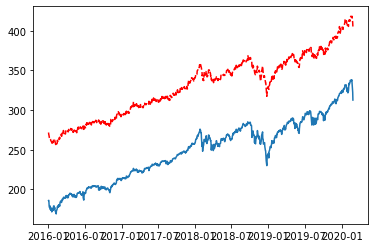

In [7]:
#Nope not what I want. givin time I would like blow up
plt.plot(data['volP'], 'r--', data['Close'])
plt.show()
 

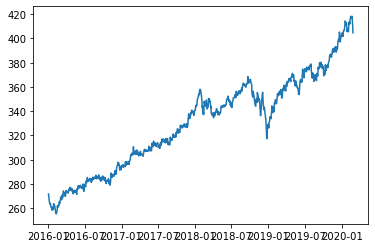

In [8]:
import seaborn as sns
sns.lineplot(data=data['volP'])

In [9]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)


In [10]:
data.head()

,Open,High,Low,Close,Volume,vopen,vclose,vlow,vhigh,volP
Date,,,,,,,,,,
2016-01-04,185.431881,185.931317,183.674575,185.922073,222353500,243.091795,243.581987,299.004782,301.365425,271.760997
2016-01-05,186.273516,186.735963,185.024918,186.236526,110845800,241.845024,241.808034,296.177937,297.989119,269.455029
2016-01-06,183.443324,185.034142,182.758912,183.887283,152112600,239.964284,240.408243,295.811007,298.188085,268.592905
2016-01-07,180.659387,182.610912,179.050068,179.475525,213436100,238.196507,237.012644,294.134665,297.799189,266.785751
2016-01-08,180.529929,181.140362,177.191063,177.505524,209817200,238.015745,234.991340,292.173045,296.225931,265.351515


In [11]:
data.isnull().sum()#Good ol' yahoo data

Open      0
High      0
Low       0
Close     0
Volume    0
vopen     0
vclose    0
vlow      0
vhigh     0
volP      0
dtype: int64

In [12]:
TRAIN_SPLIT = 500 #just making these numbers up

In [13]:
tf.random.set_seed(9)


In [14]:
uni_data = data['Close']
uni_data.index = data.index
uni_data.head()


Date
2016-01-04    185.922073
2016-01-05    186.236526
2016-01-06    183.887283
2016-01-07    179.475525
2016-01-08    177.505524
Name: Close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9649d62fd0>],
      dtype=object)

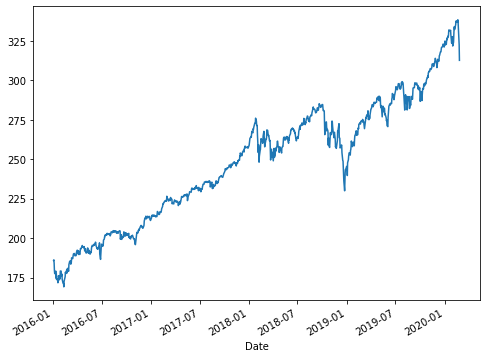

In [15]:
uni_data.plot(subplots=True) # hey this graph looks similiar

In [16]:
uni_data = uni_data.values

In [17]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()


In [22]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [19]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)


In [20]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Price to predict')
print (y_train_uni[0])


Single window of past history
[[-1.29609805]
 [-1.28155326]
 [-1.39021568]
 [-1.59427814]
 [-1.68539901]
 [-1.67727192]
 [-1.61096074]
 [-1.81758872]
 [-1.68497272]
 [-1.8612259 ]
 [-1.85053046]
 [-1.9536313 ]
 [-1.90913871]
 [-1.74529109]
 [-1.86849829]
 [-1.75898188]
 [-1.84753582]
 [-1.80561087]
 [-1.60839451]
 [-1.61139056]]

 Target Price to predict
-1.760692696434748


In [23]:
def create_time_steps(length): #believe this sets the look back a day behind
    return list(range(-length, 0))

In [24]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt



<module 'matplotlib.pyplot' from '/home/joel/anaconda3/envs/MSDS422/lib/python3.7/site-packages/matplotlib/pyplot.py'>

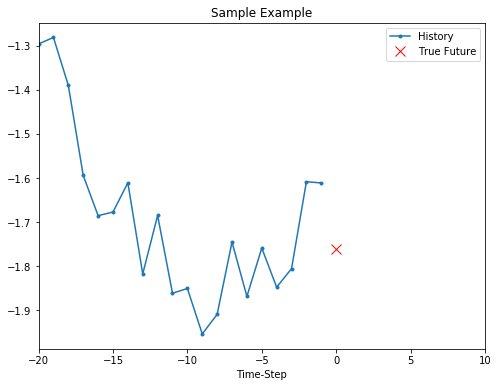

In [25]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [26]:
def baseline(history):
    return np.mean(history)


<module 'matplotlib.pyplot' from '/home/joel/anaconda3/envs/MSDS422/lib/python3.7/site-packages/matplotlib/pyplot.py'>

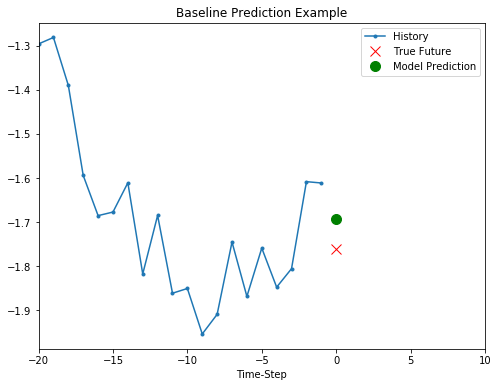

In [27]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,'Baseline Prediction Example')

In [28]:
BATCH_SIZE = 256
BUFFER_SIZE = 1000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [29]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')


In [30]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)


(256, 1)


In [31]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)


Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2422 - val_loss: 2.3605
Epoch 2/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0664 - val_loss: 2.0051
Epoch 3/10
200/200 [==============================] - 4s 18ms/step - loss: 0.0570 - val_loss: 1.9750
Epoch 4/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0522 - val_loss: 1.9570
Epoch 5/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0480 - val_loss: 1.9316
Epoch 6/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0453 - val_loss: 1.8686
Epoch 7/10
200/200 [==============================] - 4s 21ms/step - loss: 0.0435 - val_loss: 1.7927
Epoch 8/10
200/200 [==============================] - 4s 22ms/step - loss: 0.0421 - val_loss: 1.7132
Epoch 9/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0409 - val_loss: 1.6360
Epoch 10/10
200/200 [===========================

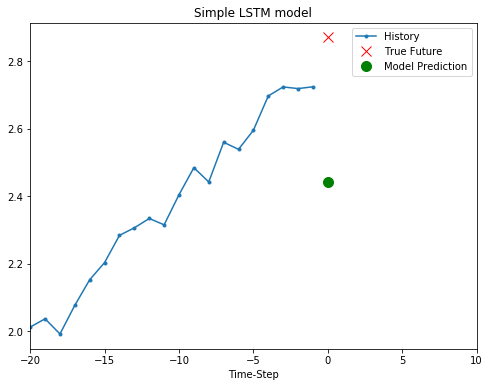

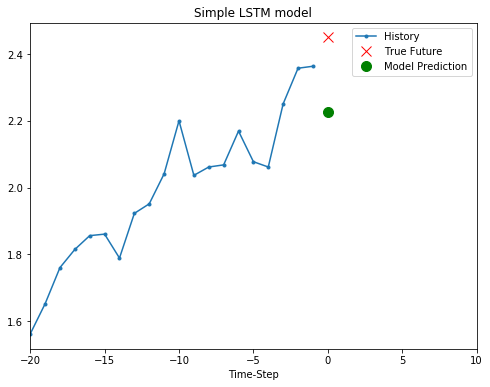

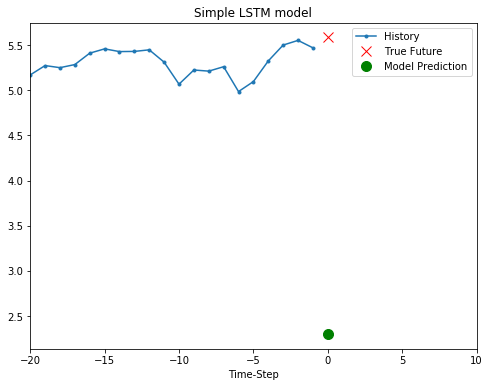

In [32]:
for x, y in val_univariate.take(3):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                      simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()


In [36]:
#using straight volume was not to good
features_considered = ['Close', 'Open', 'volP']


In [37]:
features = data[features_considered]
features.index = data.index
features.tail()


,Close,Open,volP
Date,,,
2020-02-19,338.339996,337.790009,417.867943
2020-02-20,336.950012,337.739990,418.330719
2020-02-21,333.480011,335.470001,417.840235
2020-02-24,322.420013,323.140015,410.160084
2020-02-25,312.649994,323.940002,404.673337


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96207626d0>,
      dtype=object)

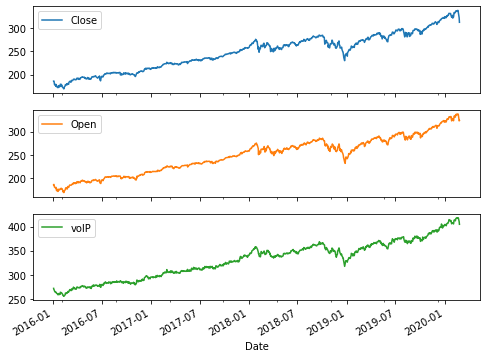

In [38]:
features.plot(subplots=True)

In [39]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [40]:
dataset = (dataset - data_mean)/data_std
dataset

array([[-1.29609805, -1.3124062 , -1.16231261],
       [-1.28155326, -1.27355017, -1.27376673],
       [-1.39021568, -1.40421253, -1.31543565],
       ...,
       [ 5.52907973,  5.61445187,  5.89811846],
       [ 5.01750813,  5.04520942,  5.52691461],
       [ 4.56560347,  5.08214272,  5.26172426]])

In [41]:
def multivariate_data(dataset, target, start_index, end_index, history_size, 
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
       
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
    return np.array(data), np.array(labels)


In [42]:
past_history = 420
future_target = 32
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)
dataset

array([[-1.29609805, -1.3124062 , -1.16231261],
       [-1.28155326, -1.27355017, -1.27376673],
       [-1.39021568, -1.40421253, -1.31543565],
       ...,
       [ 5.52907973,  5.61445187,  5.89811846],
       [ 5.01750813,  5.04520942,  5.52691461],
       [ 4.56560347,  5.08214272,  5.26172426]])

In [43]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))


Single window of past history : (70, 3)


In [44]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()


In [45]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')


In [46]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)


(91, 1)


In [47]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 10s 49ms/step - loss: 0.1895 - val_loss: 1.2609
Epoch 2/10
200/200 [==============================] - 10s 48ms/step - loss: 0.1356 - val_loss: 1.2926
Epoch 3/10
200/200 [==============================] - 11s 54ms/step - loss: 0.1075 - val_loss: 1.9682
Epoch 4/10
200/200 [==============================] - 13s 63ms/step - loss: 0.0866 - val_loss: 2.3157
Epoch 5/10
200/200 [==============================] - 9s 46ms/step - loss: 0.0779 - val_loss: 2.9119
Epoch 6/10
200/200 [==============================] - 10s 49ms/step - loss: 0.0730 - val_loss: 2.6732
Epoch 7/10
200/200 [==============================] - 10s 52ms/step - loss: 0.0693 - val_loss: 2.7994
Epoch 8/10
200/200 [==============================] - 9s 45ms/step - loss: 0.0661 - val_loss: 2.7054
Epoch 9/10
200/200 [==============================] - 10s 51ms/step - loss: 0.0641 - val_loss: 2.5607
Epoch 10/10
200/200 [====================

In [48]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

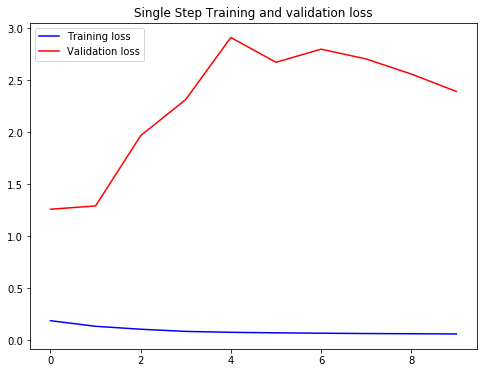

In [49]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

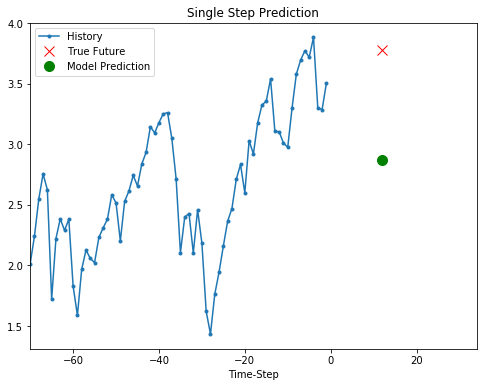

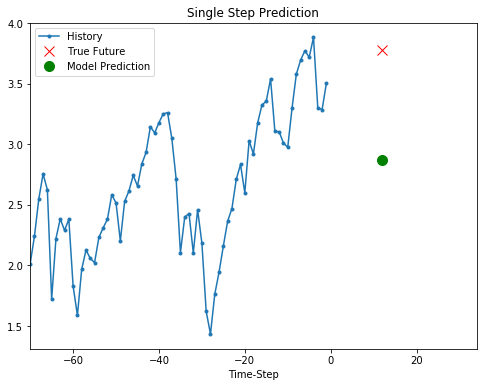

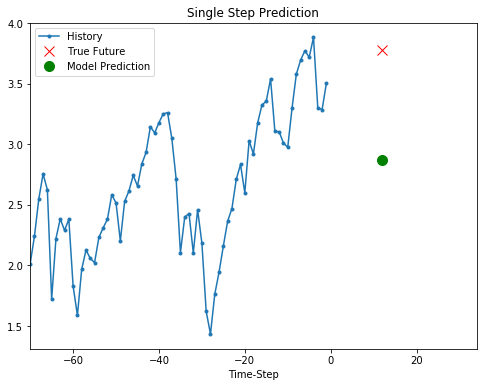

In [50]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                      'Single Step Prediction')
    plot.show()

In [51]:
future_target = 32
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [52]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (70, 3)

 Target to predict : (32,)


In [53]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [54]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

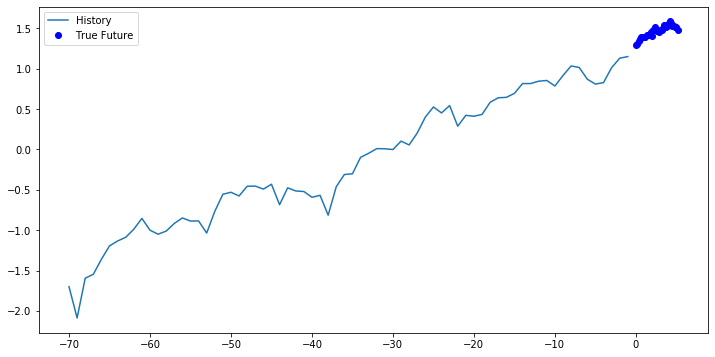

In [55]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [56]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(32))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [57]:
for x, y in val_data_multi.take(1): 
    print (multi_step_model.predict(x).shape)

(91, 32)


In [58]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=20)

Train for 200 steps, validate for 20 steps
Epoch 1/10
200/200 [==============================] - 18s 88ms/step - loss: 0.3631 - val_loss: 3.7034
Epoch 2/10
200/200 [==============================] - 16s 80ms/step - loss: 0.1406 - val_loss: 3.4497
Epoch 3/10
200/200 [==============================] - 16s 81ms/step - loss: 0.1243 - val_loss: 1.3742
Epoch 4/10
200/200 [==============================] - 17s 85ms/step - loss: 0.1111 - val_loss: 1.4827
Epoch 5/10
200/200 [==============================] - 16s 79ms/step - loss: 0.0993 - val_loss: 1.3007
Epoch 6/10
200/200 [==============================] - 17s 83ms/step - loss: 0.0913 - val_loss: 1.0891
Epoch 7/10
200/200 [==============================] - 17s 84ms/step - loss: 0.0861 - val_loss: 1.3973
Epoch 8/10
200/200 [==============================] - 17s 84ms/step - loss: 0.0820 - val_loss: 1.4028
Epoch 9/10
200/200 [==============================] - 17s 85ms/step - loss: 0.0791 - val_loss: 1.3167
Epoch 10/10
200/200 [==================

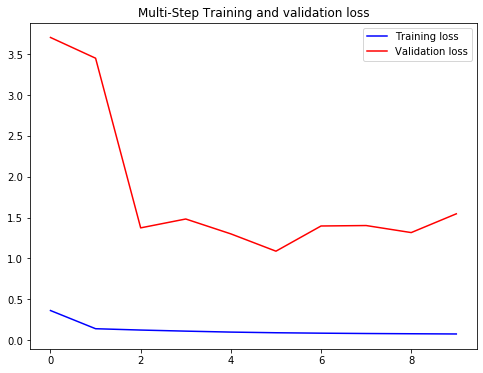

In [59]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

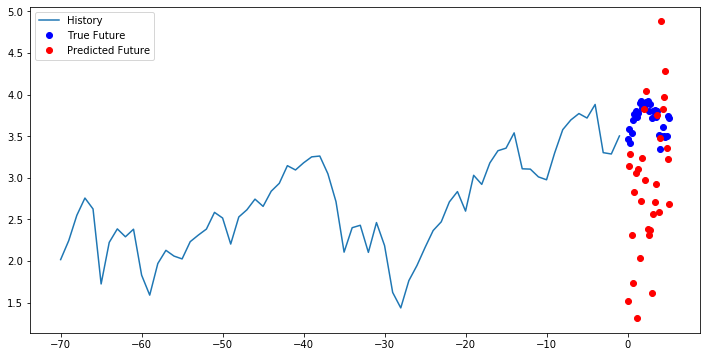

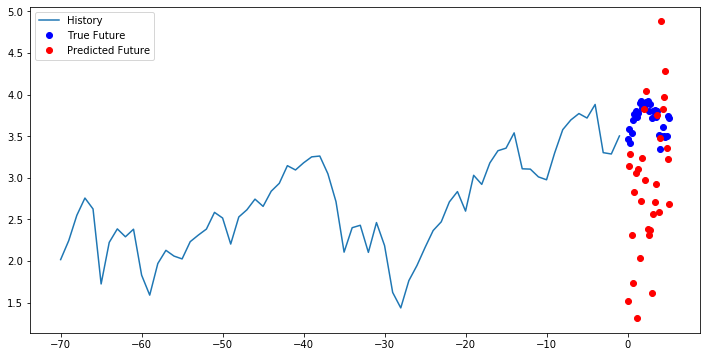

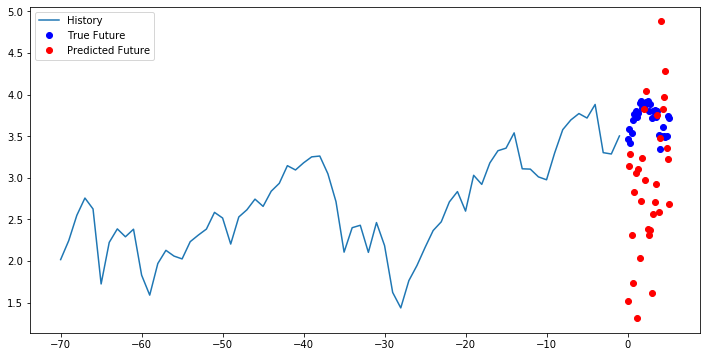

In [60]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [61]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Price to predict')
print (y_train_uni[0])

Single window of past history
[[-1.29609805]
 [-1.28155326]
 [-1.39021568]
 [-1.59427814]
 [-1.68539901]
 [-1.67727192]
 [-1.61096074]
 [-1.81758872]
 [-1.68497272]
 [-1.8612259 ]
 [-1.85053046]
 [-1.9536313 ]
 [-1.90913871]
 [-1.74529109]
 [-1.86849829]
 [-1.75898188]
 [-1.84753582]
 [-1.80561087]
 [-1.60839451]
 [-1.61139056]]

 Target Price to predict
-1.760692696434748
